In [205]:
import numpy as np
import healpy as hp
import math
import matplotlib.pyplot as plt
import dynesty
%matplotlib inline

from astropy.io import fits
from statistics import mean
from scipy.optimize import curve_fit
from astropy_healpix import HEALPix
from tqdm import tqdm
from scipy.optimize import fsolve
from scipy.optimize import minimize
from dynesty import utils as dyfunc
from dynesty import utils as dyplot
%run Function_defs.ipynb

# Files

In [192]:
files=[#["lambda_DRAO_22MHz_1_256.fits",22,"G",False,[3000,5,5000]],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-35.fits",35,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-35.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-38.fits",38,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-38.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-40.fits",40,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-40.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-45.fits",45,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-45.fits"],
       #["MAIPU_MU_1_64.fits",45,"G",False,[300,10,544]],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-50.fits",50,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-50.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-60.fits",60,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-60.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-70.fits",70,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-70.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-74.fits",74,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-74.fits"],
       #["LWA Files/healpix-all-sky-rav-wsclean-map-80.fits",80,"C",False,"LWA Uncertainties/healpix-all-sky-rav-wsclean-err-80.fits"],
       #["haslam408_dsds_Remazeilles2014.fits",408,"G",False,[1.2,10,3]],
       #["Dwingeloo_Kelvins_1_256.fits",820,"G",False,[0.5,6,0.6]],
       #["STOCKERT+VILLA-ELISA_1420MHz_1_256.fits",1420,"G",False,[0.017,5,0.5]],
       #["lambda_23de_hea.fits",2326,"C",False,[0.03,5,0.08]],
       ["ARCADE Files/arc2_3150_v19.fits",3150,"G",True,[0.005,0,0.00749]],
       ["ARCADE Files/arc2_3410_v19.fits",3410,"G",True,[0.0047,0,0.00605]],
       ["ARCADE Files/arc2_7970_v19.fits",7970,"G",True,[0.0077,0,0.0118]],
       ["ARCADE Files/arc2_8330_v19.fits",8330,"G",True,[0.0086,0,0.01348]],
       ["ARCADE Files/arc2_9720_v19.fits",9720,"G",True,[0.0039,0,0.00451]],
       ["ARCADE Files/arc2_10490_v19.fits",10490,"G",True,[0.0041,0,0.00438]],
       #["ARCADE Files/arc2_29500_v19.fits",29500,"G",True,[0.0273,0,0.153]],
       #["ARCADE Files/arc2_31000_v19.fits",31000,"G",True,[0.0135,0,0.075]],
       #["ARCADE Files/arc2_88200_v19.fits",88200,"G",True,[0.0138,0,0.0354]],
       #["ARCADE Files/arc2_89800_v19.fits",89800,"G",True,[0.0069,0,0.0207]]
      ]

# files[i][0]=file name
# files[i][1]=Mhz
# files[i][2]=coords
# files[i][3]=In thermal temp?
# files[i][4]=Uncertainty map, or [rms, calibration error, zero-level/systematic]

In [193]:
T_g_array,T_g_unc=TG_calculation(files)

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.34s/it]


In [9]:
Free408=(hp.read_map(("wmap_K_mem_freefree_9yr_v5.fits"))/1000).tolist()
Free4081=(hp.read_map(("wmap_Ka_mem_freefree_9yr_v5.fits"))/1000).tolist()
Rescaled408map=[]
for x in range(len(Free408)):
    coef=(Free408[x]*(22.8)**2.15)*(0.408)**(-2.15)
    coef1=(Free4081[x]*(33.07)**2.15)*(0.408)**(-2.15)
    Rescaled408map.append(np.mean([coef,coef1]))

# Minimizer

In [206]:
T_exc_list=[]
T_exc_err_list=[]
freq_list=[]
alpha_0_list=[]
alpha_s_list=[]
alpha_ff_list=[]
alpha_0_err_list=[]
alpha_s_err_list=[]
alpha_ff_err_list=[]
for file in files:
    T_exc,T_exc_err,alpha_0,alpha_0_err,alpha_ff,alpha_ff_err,alpha_s,alpha_s_err,freq=ChiSquaredMinimizer(file,T_g_array,T_g_unc)
    T_exc_list.append(T_exc)
    T_exc_err_list.append(T_exc_err)
    freq_list.append(freq)
    alpha_0_list.append(alpha_0)
    alpha_s_list.append(alpha_s)
    alpha_ff_list.append(alpha_ff)
    alpha_0_err_list.append(alpha_0_err)
    alpha_s_err_list.append(alpha_s_err)
    alpha_ff_err_list.append(alpha_ff_err)

4128it [00:06, 591.90it/s, +500 | bound: 8 | nc: 1 | ncall: 24240 | eff(%): 19.495 | loglstar:   -inf < -0.001 <    inf | logz: -7.403 +/-  0.113 | dlogz:  0.001 >  0.509]   
14940it [00:24, 598.20it/s, batch: 8 | bound: 5 | nc: 1 | ncall: 43300 | eff(%): 34.503 | loglstar: -4.858 < -0.002 < -0.487 | logz: -7.431 +/-  0.066 | stop:  0.927]                     


T_exc at 3150MHz is 2.49524 in the North, 2.53014 in the South w/ TT mean: 2.58755 pm 0.55392


4926it [00:08, 606.80it/s, bound: 10 | nc: 2 | ncall: 24988 | eff(%): 19.713 | loglstar:   -inf < -15071.079 <    inf | logz: -15087.829 +/-  0.183 | dlogz: 14884.243 >  0.509]   


KeyboardInterrupt: 

In [207]:
print(T_exc_list,T_exc_err_list,freq_list,alpha_0_list,alpha_s_list,alpha_ff_list,alpha_0_err_list,alpha_s_err_list,alpha_ff_err_list)

[2.5875465045359665] [0.5539161665136043] [3150] [2.189142679340319] [0.016617695576111903] [2.8347186470219308] [0.4731729261244182] [0.013980012757039934] [1.9722617198050014]


In [97]:
#alpha_s graph fitting
def loglike(x):
    return -0.5 * np.sum((np.array(alpha_s_list)-x[0]*(np.array(freq_list)/310)**(x[1]))**2/np.array(alpha_s_err_list)**2)
Temp_const,Temp_const_err=DynestyFit(2,loglike,[[10,0],[0,-5]],False)

7404it [00:11, 645.99it/s, +500 | bound: 16 | nc: 1 | ncall: 29870 | eff(%): 26.912 | loglstar:   -inf < -1218.320 <    inf | logz: -1232.275 +/-  0.161 | dlogz:  0.001 >  0.509]
18096it [00:32, 559.04it/s, batch: 8 | bound: 4 | nc: 2 | ncall: 44410 | eff(%): 40.748 | loglstar: -1222.800 < -1218.320 < -1218.907 | logz: -1232.373 +/-  0.094 | stop:  0.927]           


ValueError: x and y must be the same size

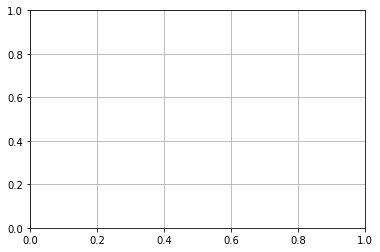

In [149]:
#alpha_s plotting
plt.grid()
plt.scatter(np.array(freq_list),(alpha_s_list),color="red",alpha=0.5)
plt.errorbar(x=freq_list,y=np.array(alpha_s_list),yerr=alpha_s_err_list,fmt="none",color="maroon",capsize=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (MHz)")
plt.ylabel("$α_s$")
plt.title("$α_s$ Power Law Fit")
plt.scatter([3150,3420,7970,8330,9720,10490],np.array([2.02,1.7,0.24,0.24,0.04,0.05])/1000,color="cyan",alpha=0.5)
plt.errorbar(x=[3150,3420,7970,8330,9720,10490],y=np.array([2.02,1.7,0.24,0.24,0.04,0.05])/1000,yerr=np.array([0.05,0.04,0.02,0.02,0.01,0.01])/1000,fmt="none",color="blue",capsize=2)
plt.plot(np.array(freq_list),Temp_const[0]*(np.array(freq_list)/310)**Temp_const[1])
#plt.savefig("alpha_s_power_law",dpi=200)
def loglike(x):
    return -0.5 * np.sum(((np.array([2.02,1.7,0.24,0.24,0.04,0.05])/1000)-x[0]*(np.array([3150,3420,7970,8330,9720,10490])/310)**(x[1]))**2/(np.array([0.05,0.04,0.02,0.02,0.01,0.01])/1000)**2)
Temp_const,Temp_const_err=DynestyFit(2,loglike,[[10,0],[0,-5]],False)
print(Temp_const,Temp_const_err)
plt.show()


In [155]:
#Fitting for the exact excess/CMB value
def loglike(x):
    return -0.5 * np.sum(((x[0]+x[1]*((np.array(freq_list)/310)**(-x[2]))-T_exc_list)/T_exc_err_list)**2)

Temp_const,Temp_const_err=DynestyFit(3,loglike,[[10,0],[200,0],[10,0]],False)
print("Chi^2/dof=%.5f"%np.sum(((Temp_const[0]+Temp_const[1]*((np.array(freq_list)/310)**(-Temp_const[2]))-T_exc_list)/T_exc_err_list)**2)/18)

9073it [00:37, 242.55it/s, +500 | bound: 60 | nc: 1 | ncall: 65392 | eff(%): 14.752 | loglstar:   -inf < -20.378 <    inf | logz: -37.721 +/-  2.014 | dlogz:  0.001 >  0.509]     
19856it [00:41, 481.62it/s, batch: 7 | bound: 5 | nc: 2 | ncall: 67538 | eff(%): 29.400 | loglstar: -25.505 < -20.381 < -21.443 | logz: -37.263 +/-  0.106 | stop:  0.869]                   


2.262859651691061


T_cmb=2.7280 pm 0.0031, beta=-2.6447 pm 0.0221
[2.727963250282754, 31.934578272881925, 2.64471009266744] [0.0030971748439800884, 1.326964323091719, 0.022109338427234615]


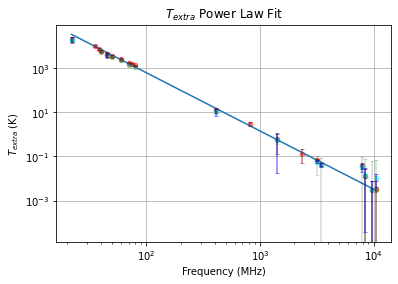

In [156]:
#Plotting and comparing
ARCADE_freqs=[22,45,408,1420,3150,3410,7970,8330,9720,10490]
Dowell_freqs=[22,40,45,50,60,70,80,408,1420,3150,3410,7970,8330,9720,10490]
ARCADE_temps=[20355,3864,13.42,3.271,2.787,2.770,2.761,2.743,2.731,2.738]
Dowell_temps=[19212,5792,4090,3443,2363,1505,1188,15.20,3.276,2.788,2.768,2.764,2.741,2.731,2.731]
ARCADE_errs=[5181,501,3.52,0.526,0.01,0.008,0.013,0.015,0.005,0.006]
Dowell_errs=[4095,963,691,526,365,208,112,2.37,0.167,0.045,0.045,0.06,0.062,0.062,0.065]
plt.plot((freq_list),(Temp_const[1]*(np.array(freq_list)/310)**(-Temp_const[2])))
plt.scatter((freq_list),(np.array(T_exc_list)-Temp_const[0]),color="red",s=20,alpha=0.5)
plt.errorbar(x=freq_list,y=np.array(T_exc_list)-Temp_const[0],yerr=T_exc_err_list,fmt="none",color="maroon",capsize=2,alpha=0.5)
plt.scatter(Dowell_freqs,(np.array(Dowell_temps)-Temp_const[0]),color="green",s=20,alpha=0.3)
plt.errorbar(x=Dowell_freqs,y=np.array(Dowell_temps)-Temp_const[0],yerr=Dowell_errs,fmt="none",color="darkgreen",capsize=2,alpha=0.2)
plt.scatter(ARCADE_freqs,(np.array(ARCADE_temps)-Temp_const[0]),color="cyan",s=20,alpha=0.5)
plt.errorbar(x=ARCADE_freqs,y=np.array(ARCADE_temps)-Temp_const[0],yerr=ARCADE_errs,fmt="none",color="blue",capsize=2,alpha=0.5)
plt.xlabel("Frequency (MHz)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$T_{extra}$ (K)")
plt.title("$T_{extra}$ Power Law Fit")
print("T_cmb=%.4f pm %.4f, beta=-%.4f pm %.4f" % (Temp_const[0],Temp_const_err[0],Temp_const[2],Temp_const_err[2]))
plt.grid()
#plt.savefig("T_exc_power_law",dpi=200)
plt.show()